In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transferEntropy import *

In [2]:
def step_signal (low, high, larg_high_i=170, larg_high_f=200, larg_low_i=170, larg_low_f=200, prob_positivo=0.5, n=2000):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high,high,np.random.randint(larg_high_i, larg_high_f))\
                             if x == 1 else np.random.uniform(low,low,np.random.randint(larg_low_i, larg_low_f)) \
                             for x in distrib])
    return signal

In [3]:
def generate_df_valid_corrs(df, limit):
    df_valid = pd.DataFrame(np.zeros([df.shape[0], df.shape[1]], dtype=int), columns = df.columns, index= df.columns)
    for row in df.columns:
        for col in df.columns:
            if df[row][col] > limit:
                df_valid[row][col] = 1
                
    return df_valid 

In [27]:
comps = np.power(2,[6,8,10,12,14])
signals_one = [step_signal(0,1)[:comp] for comp in comps]
signals_two = [step_signal(0,1)[:comp] for comp in comps]


In [31]:
len(signals_one[4])

16384

In [32]:
tempos = []
for sig1, sig2 in zip(signals_one, signals_two):
    for dim in np.log2(comps).astype(int):
        start = time.clock()
        te(dim//2, dim//2, 1, sig1, sig2, 'a', 'b')
        end = time.clock()
        tempos.append(end-start)
 

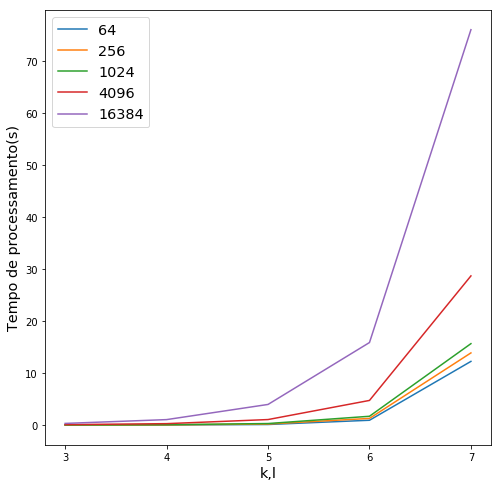

In [185]:
fig, ax = plt.subplots(figsize=(8,8))
labels = [str(w) for w in (np.log2(comps)//2).astype(int)]
x = np.arange(3, 8).astype(int)

for i in np.arange(0,5):
    ax.plot(x, tempos[i*5:(i+1)*5], label=str(comps[i]))
    plt.xticks(x, labels)
    ax.set_xlabel("k,l", fontsize='x-large')
    ax.set_ylabel('Tempo de processamento(s)',fontsize='x-large')
    ax.legend((loc=2, fontsize='x-large')
    

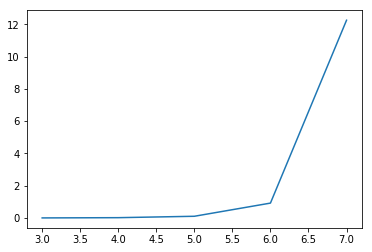

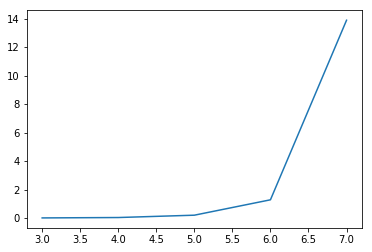

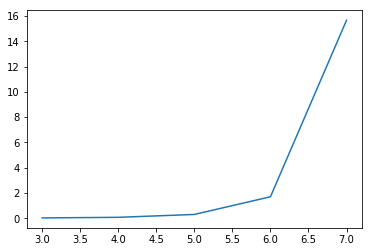

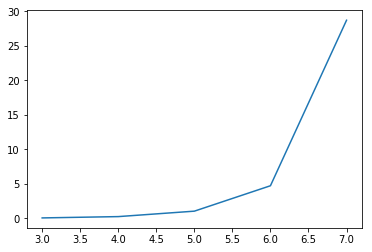

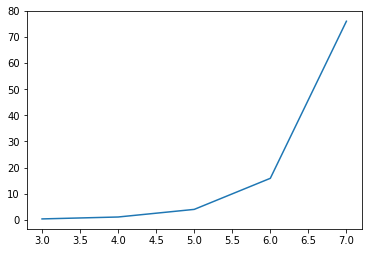

In [186]:
for i in np.arange(0,5):
    plt.plot(x, tempos[i*5:(i+1)*5], label=str(comps[i]))
    plt.show()

In [224]:
((tempos[20:25][-1] - tempos[0:5][-1])/tempos[0:5][-1])*100

520.8874496603173

In [225]:
var_percent = []
for i in np.arange(0,5):
    var_percent.append(
        ((tempos[20:25][-1] - tempos[i*5:(i+1)*5][-1])/tempos[i*5:(i+1)*5][-1])*100)

In [226]:
var_percent

[520.8874496603173,
 447.8580985132194,
 385.5700952743616,
 165.05478993285956,
 0.0]